# Getting Deep in That Tinder Data

By David Curry   
August, 2019

Welcome.  We are about to go on a potentially interesting journey together: descending the Tinder data mines.  They are deep, frought with existential dread and jubilation, and memories that may be best left forgotten, but that are ultimately valuable and rewarding due to their mere existence, and them being a part of me.

This notebook will explore Tinder profile data that is available for any user by request from: https://account.gotinder.com/data.

A few open questions:

1) What fields are in the dataset?

2) How granular does the data go?

3) How will future historinans look upon me from and my fellow Tinderonis?


The data format is JSON.  Ultimately, I would like to prepare the swipe data for use in a Sankeymatic (http://sankeymatic.com) plot.  Lets get started.

### Imports

In [36]:
import pandas as pd
import matplotlib as plt
import seaborn as sb

### Data Path

In [3]:
infile = '/Users/hal3000/Downloads/myData/data.json'

## Load the my Tinder data (what could be in it?)

In [13]:
# Load the Tinder Data
df = pd.read_json(infile, lines=True)

In [27]:
usage = pd.read_json(df['Usage'].to_json(), orient='rows').T

In [28]:
usage

,app_opens,matches,messages_received,messages_sent,swipes_likes,swipes_passes
0,"{'2017-12-28': 24, '2017-12-29': 30, '2017-12-...","{'2017-12-28': 0, '2017-12-29': 0, '2017-12-30...","{'2017-12-28': 0, '2017-12-29': 0, '2017-12-30...","{'2017-12-28': 0, '2017-12-29': 0, '2017-12-30...","{'2017-12-28': 85, '2017-12-29': 615, '2017-12...","{'2017-12-28': 1225, '2017-12-29': 1235, '2017..."


## Looks like we have 6 fields relating to swiping and messaging.
Lets focus first on app_opens (usage over time)

In [56]:
app_opens = pd.read_json(usage['app_opens'].to_json())

In [57]:
# reindex the date range toi handle missing dates when no usage took place.
idx = pd.date_range('12-28-2017', '08-01-2019')
app_opens = app_opens.reindex(idx, fill_value=0)

## Plot Tinder usage over time
Y-axis represents the number  of times I opened the Tinder app.

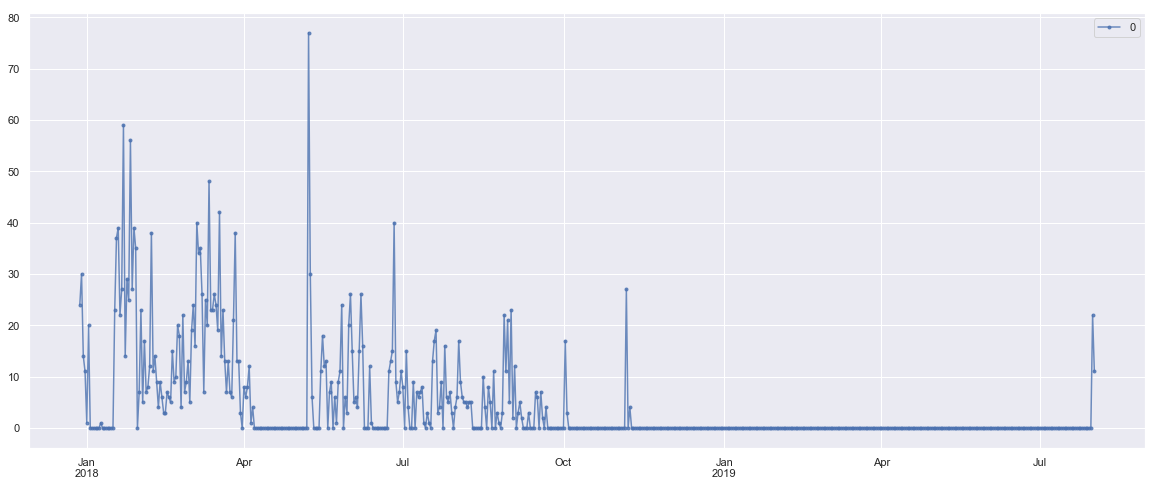

In [66]:
sb.set(rc={'figure.figsize':(20, 8)})
app_opens.plot(marker='.', alpha=0.8)

#### Very interesting... I went through epochs of furious Tinder swiping, followed by times of total Tinder blackout.
Lets now look at my swipe statistics.

In [73]:
swipes_likes  = pd.read_json(usage['swipes_likes'].to_json())
swipes_passes = pd.read_json(usage['swipes_passes'].to_json())

# fix the time index again
swipes_likes  = swipes_likes.reindex(idx, fill_value=0)
swipes_passes = swipes_passes.reindex(idx, fill_value=0)

## How did I swipe over time?

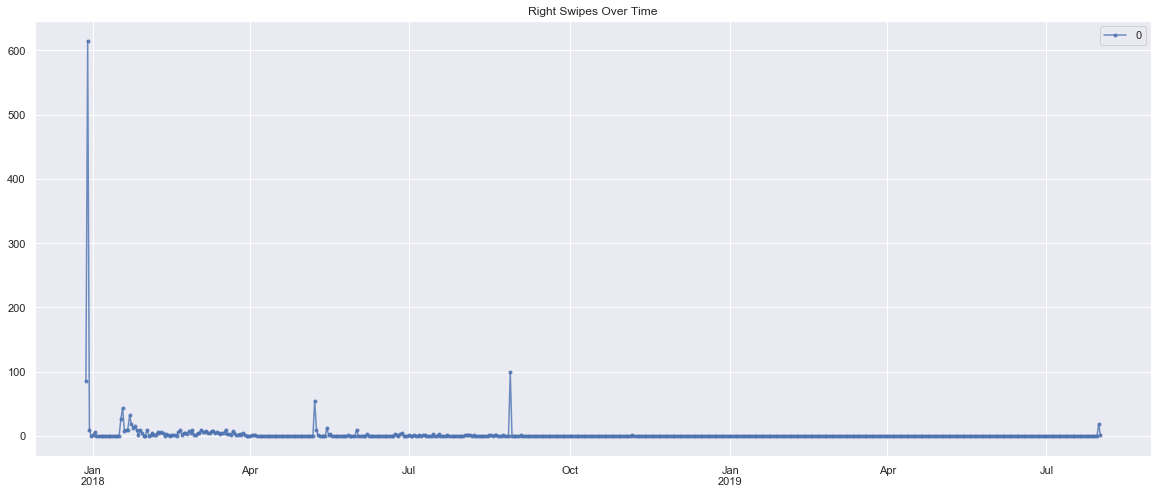

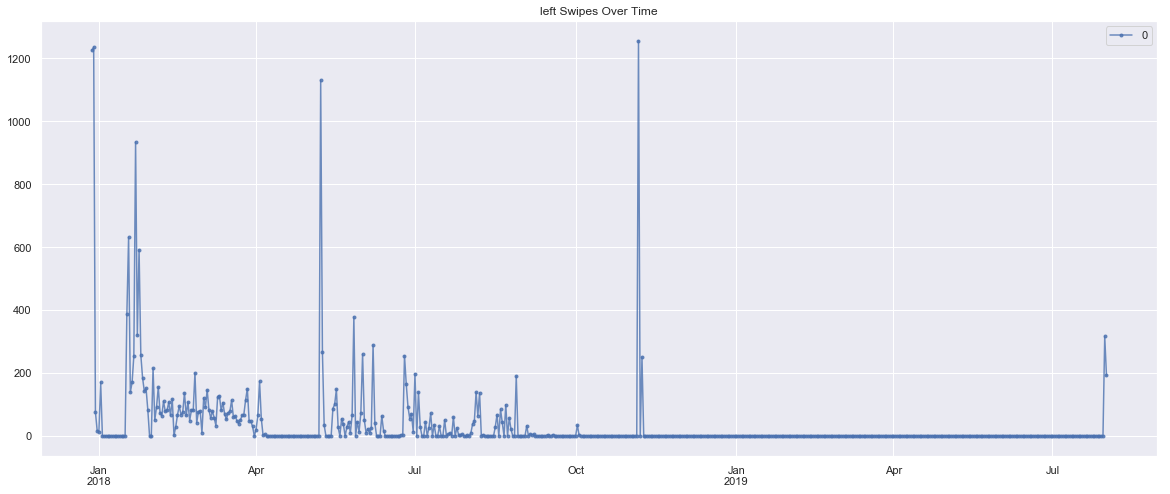

In [80]:
swipes_likes.plot(marker='.', alpha=0.8, title='Right Swipes Over Time')
swipes_passes.plot(marker='.', alpha=0.8,title='left Swipes Over Time')

### Wow... I mean, what can I say?  I swipe left way, WAY more than I do right.  

Beyond just the bulk count of swipes, there is also a few interesting times where I only swiped left.  Perhaps, I was not serious about meeting anyone and just interested in parousing the oddities of online dating.

## More swipe stats

In [84]:
# first we need summary stats of my swiping
total_right_swipes = swipes_likes.sum()
total_left_swipes  = swipes_passes.sum()

In [100]:
print('Left Swipes :', total_left_swipes[0])
print('Right Swipes:', total_right_swipes[0])
print('Swipe Right Ratio (right/total):', total_right_swipes[0]/(total_left_swipes[0]+total_right_swipes[0])*100)

Left Swipes : 19915
Right Swipes: 1410
Swipe Right Ratio (right/total): 6.611957796014067


## I only swipe right 6.6% of the time!
Ok of those times, how many do I get swiped back?

In [93]:
matches = pd.read_json(usage['matches'].to_json())
matches = matches.reindex(idx, fill_value=0)

In [97]:
total_matches = matches.sum()

In [99]:
print('total matches:', total_matches[0])
print('match ratio  :', total_matches[0]/total_right_swipes[0]*100)

total matches: 94
match ratio  : 6.666666666666667


## WHAT! My match percentage is the same as my swipe right percentage?  Coincidence... probably not.  